<a href="https://colab.research.google.com/github/ailove27/housing/blob/main/Sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading dataset
df = pd.read_csv("/content/Housing.csv")  # make sure this file is in the same folder
df.columns = [c.lower() for c in df.columns]  # lowercase column names

In [7]:
#looking for missing information
missing_percentages = df.isnull().sum() / len(df) * 100
#there is no missing information

variable_descriptions = {}
for col in df.columns:
    variable_descriptions[col] = {
        'data_type': str(df[col].dtype),
        'description': 'Description for ' + col, # Placeholder description
        'relevance': 'Relevance for ' + col, # Placeholder relevance
        'missing_percentage': missing_percentages[col]
    }

# Print a sample to verify (e.g., for the first few columns)
for col, desc in list(variable_descriptions.items())[:5]:
    print(f"Variable: {col}")
    for key, value in desc.items():
        print(f"  {key}: {value}")
    print("---")

Variable: price
  data_type: int64
  description: Description for price
  relevance: Relevance for price
  missing_percentage: 0.0
---
Variable: area
  data_type: int64
  description: Description for area
  relevance: Relevance for area
  missing_percentage: 0.0
---
Variable: bedrooms
  data_type: int64
  description: Description for bedrooms
  relevance: Relevance for bedrooms
  missing_percentage: 0.0
---
Variable: bathrooms
  data_type: int64
  description: Description for bathrooms
  relevance: Relevance for bathrooms
  missing_percentage: 0.0
---
Variable: stories
  data_type: int64
  description: Description for stories
  relevance: Relevance for stories
  missing_percentage: 0.0
---


In [11]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Define feature (X) and target (y)
X = df['area'].values.reshape(-1, 1)  # Reshape for single feature
y = df['price']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate R-squared and RMSE
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 6. Print the results
print(f"Baseline Model Performance (Linear Regression with 'area'):")
print(f"R-squared (R^2): {r_squared:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Baseline Model Performance (Linear Regression with 'area'):
R-squared (R^2): 0.2729
Root Mean Squared Error (RMSE): 1917103.70


Coefficient for 'area': 425.73
Intercept: 2512254.26


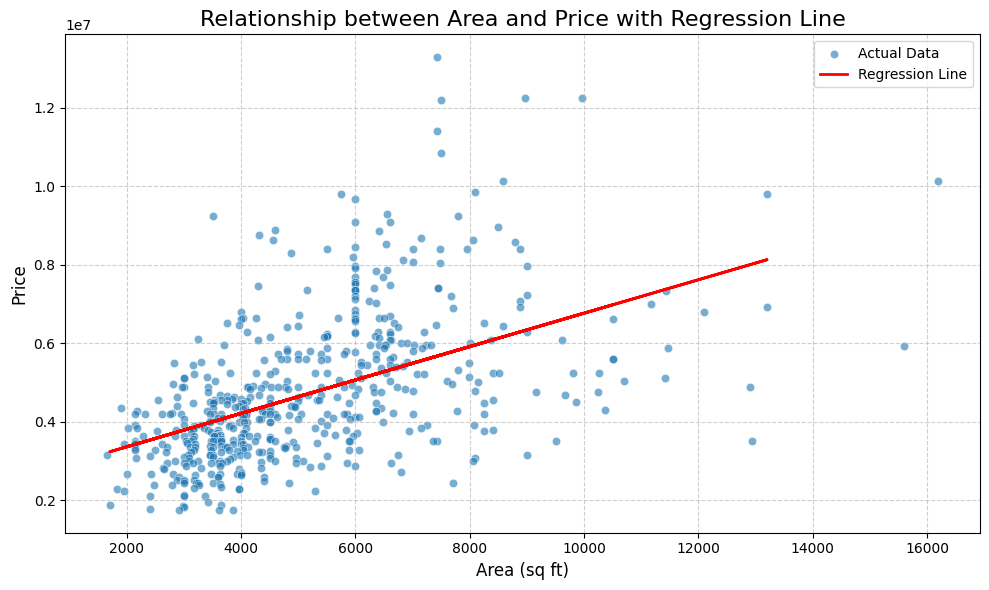

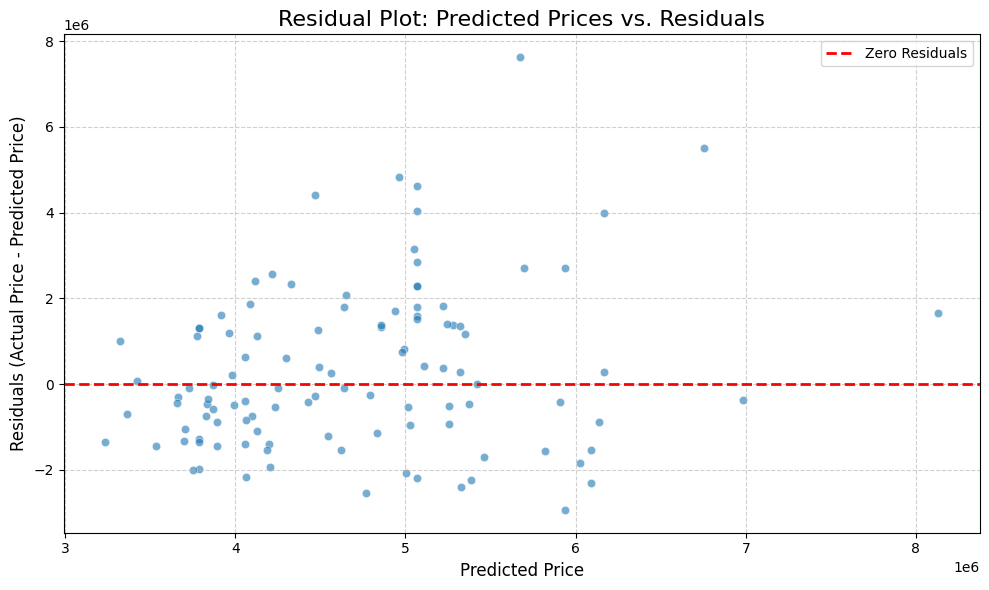

In [12]:
# 1. Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Calculate the coefficient of the 'area' feature
area_coefficient = model.coef_[0]
print(f"Coefficient for 'area': {area_coefficient:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# 3. Create a scatter plot of 'area' vs. 'price' with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price'], alpha=0.6, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Relationship between Area and Price with Regression Line', fontsize=16)
plt.xlabel('Area (sq ft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Calculate the residuals of the model
residuals = y_test - y_pred

# 5. Create a scatter plot of predicted values (y_pred) against the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.title('Residual Plot: Predicted Prices vs. Residuals', fontsize=16)
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals (Actual Price - Predicted Price)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Exclude 'price' from numerical features for X_multi
numerical_features_for_X = [col for col in numerical_cols if col != 'price']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity

# Prepare X_multi by selecting all numerical features (including new encoded ones) and excluding 'price'
X_multi = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Ensure all columns are numeric after encoding (important for statsmodels)
X_multi = X_multi.select_dtypes(include=np.number)

print("Shape of X_multi:", X_multi.shape)
print("Columns in X_multi (sample):")
print(X_multi.columns[:5]) # Print first 5 columns to check
print("Shape of y:", y.shape)

Shape of X_multi: (545, 5)
Columns in X_multi (sample):
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Shape of y: (545,)


In [ ]:
X_multi_train, X_multi_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Add a constant to the training data for statsmodels.OLS
X_multi_train_const = sm.add_constant(X_multi_train)

# Train the OLS model
mlr_model = sm.OLS(y_train, X_multi_train_const).fit()

# Print the summary of the OLS model
print("\n--- Multiple Linear Regression Model Summary ---")
print(mlr_model.summary())

# Make predictions on the test set
X_multi_test_const = sm.add_constant(X_multi_test, has_constant='add')
y_mlr_pred = mlr_model.predict(X_multi_test_const)

# Calculate R-squared and RMSE for the Multiple Linear Regression model
r_squared_mlr = r2_score(y_test, y_mlr_pred)
rmse_mlr = np.sqrt(mean_squared_error(y_test, y_mlr_pred))

print(f"\nMultiple Linear Regression Model Performance:")
print(f"R-squared (R^2): {r_squared_mlr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlr:.2f}")



--- Multiple Linear Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     110.4
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           7.71e-75
Time:                        23:08:28   Log-Likelihood:                -6707.6
No. Observations:                 436   AIC:                         1.343e+04
Df Residuals:                     430   BIC:                         1.345e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

--- MLR Coefficients with 95% Confidence Intervals ---
            Coefficient       Lower CI      Upper CI
const      5.199968e+04 -451967.472138  5.559668e+05
area       3.088670e+02     255.046626  3.626873e+02
bedrooms   1.512468e+05  -18934.803405  3.214283e+05
bathrooms  1.185732e+06  925474.744658  1.445989e+06
stories    4.951008e+05  351937.389037  6.382641e+05
parking    3.376608e+05  199112.846897  4.762088e+05


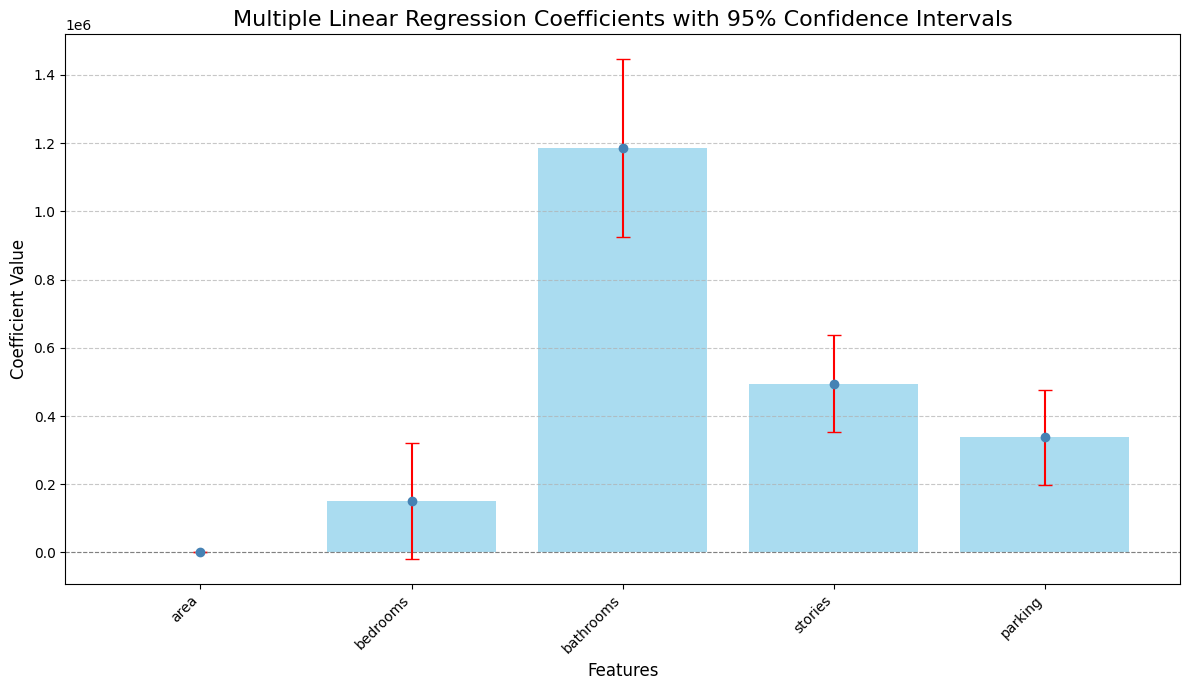

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract coefficients and their 95% confidence intervals
coefficients_df = mlr_model.conf_int()
coefficients_df.columns = ['Lower CI', 'Upper CI']
coefficients_df['Coefficient'] = mlr_model.params
coefficients_df = coefficients_df[['Coefficient', 'Lower CI', 'Upper CI']]

# Exclude 'const' for plotting, but keep it for reference
coefficients_to_plot = coefficients_df.drop('const')

print("--- MLR Coefficients with 95% Confidence Intervals ---")
print(coefficients_df)

# 2. Generate a bar plot to visualize the coefficients with confidence intervals
plt.figure(figsize=(12, 7))
plt.errorbar(x=coefficients_to_plot.index, y=coefficients_to_plot['Coefficient'],
             yerr=[coefficients_to_plot['Coefficient'] - coefficients_to_plot['Lower CI'],
                   coefficients_to_plot['Upper CI'] - coefficients_to_plot['Coefficient']],
             fmt='o', color='steelblue', ecolor='red', capsize=5, linestyle='None')
plt.bar(coefficients_to_plot.index, coefficients_to_plot['Coefficient'], color='skyblue', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Multiple Linear Regression Coefficients with 95% Confidence Intervals', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


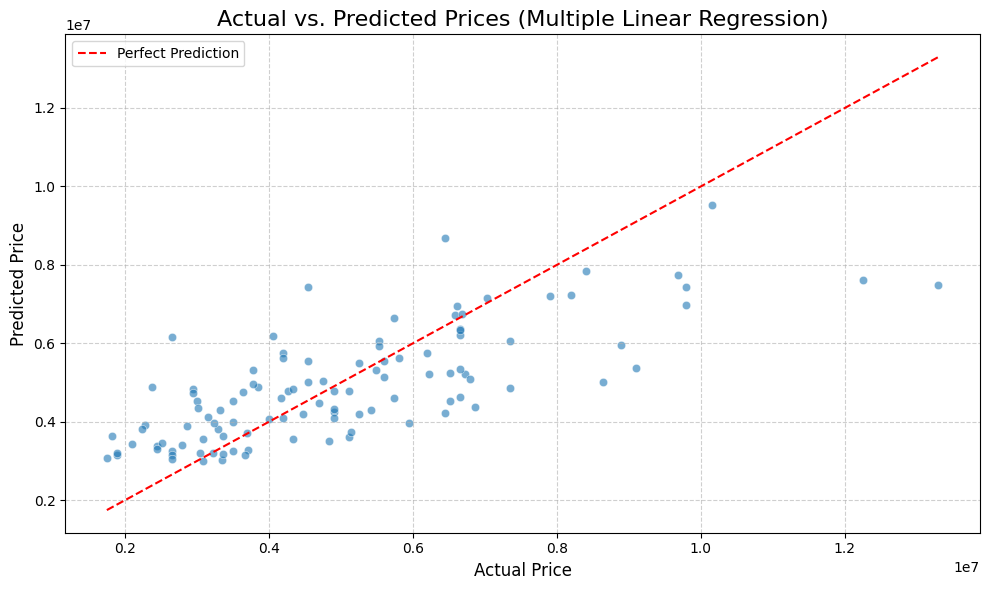

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Create a scatter plot of actual test prices (y_test) against the predicted test prices (y_mlr_pred)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_mlr_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction') # Diagonal line
plt.title('Actual vs. Predicted Prices (Multiple Linear Regression)', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

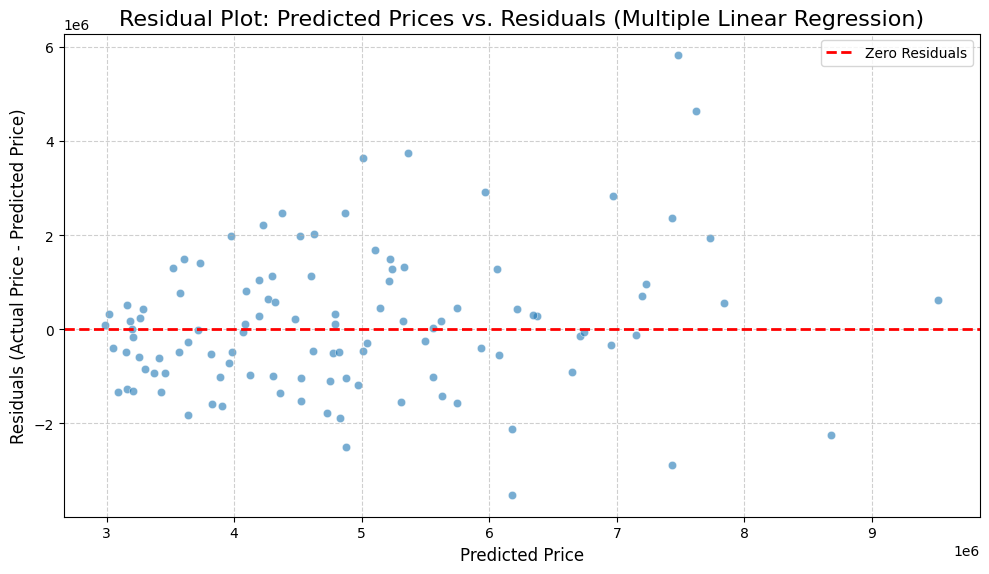

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 4. Calculate the residuals for the Multiple Linear Regression model
residuals_mlr = y_test - y_mlr_pred

# 5. Create a scatter plot of predicted values (y_mlr_pred) against these residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_mlr_pred, y=residuals_mlr, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.title('Residual Plot: Predicted Prices vs. Residuals (Multiple Linear Regression)', fontsize=16)
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals (Actual Price - Predicted Price)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()